In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Transformer-based Architecture

Transformers are a type of machine learning model designed for manipulating sequence data, such as text or time series. Since their inception in 2017, transformers have become the cornerstone of advanced natural language processing (NLP) models. Transformers are significant due to their ability to capture complex relationships in data and their flexibility in various tasks, ranging from language modeling to text understanding. They form the foundation for some of the most powerful NLP models, such as BERT or ChatGPT.

### Applications of Transformers

Transformers are used in a wide range of applications, including:

- **Text Generation:** The ability to generate text, which is highly valuable in content creation, chatbots, and other text-based applications.
- **Language Translation:** Transformers are employed for translating text between different languages with high accuracy.
- **Text Summarization:** Using transformers to create concise summaries of longer texts.
- **Question-Answering:** Utilizing transformers to automatically answer questions based on provided textual information.
- **Sentiment Analysis:** Transformer models are capable of recognizing emotional sentiment in text.

### Key Characteristics of Transformers

#### Encoder-Decoder Structure

Most transformer architectures follow an encoder-decoder structure. The encoder processes input data, and the decoder generates outputs. This structure enables efficient data processing and generation.
- **Encoder:** The encoder consists of a sequence of encoder blocks, each containing an attention layer and a feed-forward neural network. Encoders are responsible for converting input data into representations suitable for further processing.
- **Decoder:** The decoder has a similar structure to the encoder but also includes an additional attention mechanism that focuses on the encoder's outputs, allowing it to generate target data sequences.

#### Attention Mechanism

Transformer models employ an attention mechanism that allows them to weigh the importance of different parts of input data. This mechanism enables the models to "focus" on crucial information within data sequences. There are three main types of attention:
- **Self-Attention:** Each element in the input sequence can interact with others and gather information from the entire input.
- **Scaled Dot-Product Attention:** This mechanism calculates the importance of different parts of the input data through a scaled scalar product operation, ensuring stable training. The resulting attention scores determine the significance of each input element in the current context.
- **Encoder-Decoder Attention:** The decoder focuses on relevant parts of the input when generating output.
- **Multi-Head Attention:** The model can simultaneously focus on different positions in the input data and gain various "views" of the input.

#### Working Principle of the Transformer

The transformer follows an encoder-decoder structure, where each encoder reads input data, and each decoder generates outputs. Attention layers in these blocks allow the model to dynamically adapt and focus on critical information at each prediction step.

# Real-Life Transformer Models
Here are several models developed in the technology industry, based on the transformer architecture:


### BERT (Bidirectional Encoder Representations from Transformers)
BERT is a revolutionary model in the field of Natural Language Processing (NLP) that Google introduced. Unlike older models that only interpreted text in one direction, BERT analyzes the context of words by looking both at what comes before and after them in a sentence. This bidirectional understanding significantly enhances how machines grasp the subtleties of language. At the core of BERT is the Transformer architecture, which employs an attention mechanism. This allows BERT to 'pay attention' to specific parts of a sentence more than others, thus learning the complexities of language patterns more effectively.

BERT's effectiveness in processing language lies in its structured approach, which involves two critical phases:
- **Pre-training** - BERT is fed with massive amounts of text data. During this phase, it learns two main skills: predicting the hidden words in a sentence(Masked Language Model task), and discerning whether one sentence logically follows another(Next Sentence Prediction task). This pre-training equips BERT with a broad understanding of language.
- **Fine-tuning** - The pre-trained BERT model is tailored to perform specific tasks. Starting with the knowledge gained in pre-training, the model undergoes additional training on a narrower dataset relevant to the particular task. This fine-tuning process allows BERT to adjust its language comprehension to the nuances of the target task. An example of applying BERT is in sentiment analysis, where it assesses the emotional tone behind a series of words to understand the attitudes, opinions, and emotions expressed.

# Practical Application: Applying BERT for sentiment analysis
For the practical part, we will use the IMDB movie review dataset, which is a set of reviews from the Internet Movie Database (IMDB) labeled as positive or negative.

**IMPORTANT** This notebook is running with **[reqs-torch.txt](https://github.com/FIIT-ISA/2023-2024/blob/main/exercises/reqs-torch.txt)** in CPU. The version in GPU is still not tested with pytorch nor Tensorflow-gpu. The running time is nearly **15 min** in desktop.

**Step 1:** Importing the necessary libraries and loading the Dataset

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Variables to set the number of epochs and samples
num_epochs = 10
num_samples = 100  # when you want to use all data set this to 0

# Load the IMDB dataset
dataset = load_dataset('imdb')

**Step 2:** Preprocessing dataset with Tokenization

Before feeding the data into BERT, we need to tokenize our text. This means converting our sentences into a format that BERT understands, which involves breaking down sentences into words and subwords, and then mapping these to indexes.

In [2]:
# Initialize the BERT tokenizer using the 'bert-base-uncased' model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# Define a function to tokenize examples from the dataset
def tokenize_function(examples):
    # Tokenize the text, padding sequences to the max length and truncating if necessary
    return tokenizer(examples["text"], padding="max_length", truncation=True)
# Apply the tokenize_function to the entire dataset in batches
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
# Creating small shuffled training and evaluation datasets
# If you set num_samples to 0 you will use all data
if num_samples == 0:
    train_dt = tokenized_datasets["train"].shuffle(seed=42)
    eval_dt = tokenized_datasets["test"].shuffle(seed=42)
else:
    train_dt = tokenized_datasets["train"].shuffle(seed=42).select(range(num_samples)) 
    eval_dt = tokenized_datasets["test"].shuffle(seed=42).select(range(num_samples))

**Step 3:** Loading pre-trained model

In [4]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Step 4:** Definition of training arguments

In [5]:
training_args = TrainingArguments("test_trainer", evaluation_strategy="epoch", use_cpu=True, num_train_epochs=num_epochs)

**Step 5:** Creating Trainer instance and start training

In [6]:
# Creating Trainer instance
trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dt, eval_dataset=eval_dt
)
# Starting training
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.689855
2,No log,0.664509
3,No log,0.362065
4,No log,0.508870
5,No log,0.694143
6,No log,0.808403
7,No log,0.800920
8,No log,0.762910
9,No log,0.759985
10,No log,0.759610


TrainOutput(global_step=130, training_loss=0.18450786884014422, metrics={'train_runtime': 2899.5251, 'train_samples_per_second': 0.345, 'train_steps_per_second': 0.045, 'total_flos': 263111055360000.0, 'train_loss': 0.18450786884014422, 'epoch': 10.0})

**Step 6:** Evaluation

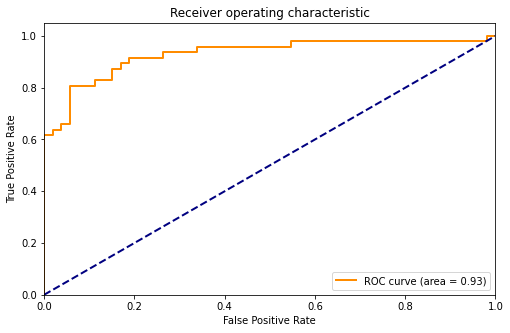

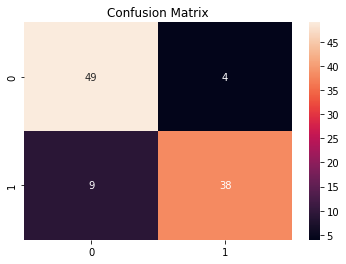

In [7]:
# Here, we use the trained BERT model to make predictions on the evaluation dataset.
# The `trainer.predict` function returns the model's predictions for the provided evaluation dataset.
predictions = trainer.predict(eval_dt)

# The Receiver Operating Characteristic (ROC) curve
# ROC curve is a graphical representation of a classifier's capability.
# It illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings.
fpr, tpr, _ = roc_curve(eval_dt['label'], predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with matplotlib
plt.figure(figsize=(1.618 * 5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
# A confusion matrix is a table that visualizes the performance of a classification model.
# It provides counts of correct and incorrect predictions broken down by actual classes.
cm = confusion_matrix(eval_dt['label'], predictions.predictions.argmax(-1))

# We use a heatmap for a better visualization of the confusion matrix.
# Using `sns.heatmap` gives us a color-coded overview that is easier to interpret.
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

**Step 7:** Applying model to a new sample

In [8]:
# We start by defining a new sample text for which we want to predict the sentiment.
sample_text = "This is a bad movie. I really hate it."

# The tokenizer converts the sample text into a format that can be understood by the BERT model.
# 'padding' to 'max_length' ensures that all inputs are padded to the same length, here it is set to 512 tokens.
# 'truncation' is set to True to ensure that inputs longer than 512 tokens are truncated.
# 'return_tensors' set to "pt" means that the tokenizer will return PyTorch tensors.
sample_inputs = tokenizer(sample_text, padding="max_length", truncation=True, max_length=512, return_tensors="pt")

# If a GPU is available, we move the inputs to the GPU to speed up prediction.
# 'training_args.device' is used to identify the device that was used during training (either a CPU or a GPU).
sample_inputs.to(training_args.device)

# Making a prediction by passing the tokenized input through the model.
# The model outputs 'logits', which are raw, unnormalized scores for each class.
predictions = model(**sample_inputs)

# The predicted class is the one with the highest score after applying the argmax function.
# '.item()' is used to convert the result from a tensor to a Python integer.
predicted_class = predictions.logits.argmax(-1).item()

# The mapping of the class indices to sentiment (e.g., 1 for positive and 0 for negative) 
if predicted_class == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")

Negative sentiment


**Try out:** Be inventive! You're encouraged to modify the sample_text to any random text you prefer. See what sentiment will model generate.

# GPT (Generative Pre-Trained Transformer)
GPT model family, developed by OpenAI, represents the forefront of advancements in Natural Language Processing (NLP). It is distinguished by its remarkable proficiency in generating text that closely mimics human writing in coherence and context sensitivity. While models such as BERT are engineered primarily for text interpretation tasks, GPT model family excels in the generation of text. It is versatile in its utility, capable of performing an array of NLP tasks such as translating languages, providing responses to queries, condensing lengthy documents, and even producing novel written works.

## Practical Application: Using GPT model for generating text

**Step 1:** Importing necessary libraries

In [9]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

**Step 2:** Loading the pretrained GPT model and tokenizer

In [15]:
# For this example, we use 'gpt2' as a stand-in for the GPT model family 
# since the actual GPT-3 model and higher versions are still not directly available as a part of the transformers library.
# The 'gpt2', 'gpt2-medium', and 'gpt2-large' are smaller variants but still offer substantial language generation capabilities.

model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name, pad_token_id=tokenizer.eos_token_id)

**Step 3:** Define a prompt and tokenize it

In [11]:
# Define a prompt for text generation
prompt = "Machine learning is fun, because"

# Tokenize the prompt to convert the text to a format the model can understand (numerical tokens)
input_ids = tokenizer.encode(prompt, return_tensors='pt')

**Step 4:** Creating an attention mask and generating a text with it

In [12]:
# Create an attention mask
# This mask tells the model which tokens should be paid attention to and which should not (e.g., padding tokens)
attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device)

# Generate text with attention mask
# The model takes the tokenized input and generates text based on the patterns it has learned during training.
# The various parameters control the text generation process, such as how long the output should be (max_length),
# preventing the model from repeating the same n-grams (no_repeat_ngram_size), and how many tokens to consider at a time (top_k)
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, attention_mask=attention_mask)

**Step 5:** Decoding and printing the generated text

In [13]:
# Decode the generated text from tokens back to human-readable text, while skipping any special tokens that are used for internal model purposes
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Machine learning is fun, because it's easy to learn. But it also means that you can't just learn to do it. You have to be able to understand the world around you.

I'm not saying that learning to code is easy. I'm saying it is a lot easier than learning how to program. It's not that hard. And it takes a little bit of practice. So I think that's a good thing.


**Try out:** Be inventive! You're encouraged to modify the prompt to any random text you prefer. See what unique text the model generates with your new prompt.

# Other Real-Life Transformer Models
- **LaMDA (Language Model for Dialogue Applications):** LaMDA is a language model developed by Google that's designed specifically for creating more natural and open-ended conversations. Unlike most traditional language models that are trained on a variety of tasks, LaMDA is fine-tuned to excel in dialogue, aiming to understand the nuances of human communication such as humor, irony, and complex topics.
- **ChatGPT:** ChatGPT is a language model developed by OpenAI, based on the GPT (Generative Pretrained Transformer) architecture. It's designed to generate human-like text based on the prompts it receives. ChatGPT can be used for a variety of applications, such as answering questions, writing essays, creating content, coding, and more. (Link: https://chat.openai.com/)
- **Llama 2:** Llama 2 is open source and his models are trained on 2 trillion tokens. (More information origin website:https://ai.meta.com/resources/models-and-libraries/llama/ . Also github: https://github.com/facebookresearch/llama#llama-2)